In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
import matplotlib.dates as mdates
import mpl_finance
from mpl_finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['PETR4','ITSA4', 'USIM5','ABEV3','VALE3']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=36
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  5 of 5 downloaded


In [12]:
stocks_all.head()

Open                                             High  \
             ABEV3.SA ITSA4.SA PETR4.SA USIM5.SA   VALE3.SA   ABEV3.SA   
Date                                                                     
2015-10-26  19.799999  6.15760     8.05     3.10  18.549999  19.870001   
2015-10-27  19.600000  6.03445     7.86     3.06  17.809999  19.860001   
2015-10-28  19.629999  6.00982     7.87     3.04  16.860001  19.660000   
2015-10-29  19.120001  5.91130     7.57     2.87  16.209999  19.379999   
2015-10-30  18.870001  5.88667     7.60     2.81  16.309999  19.260000   

                                                   ...     Adj Close  \
           ITSA4.SA PETR4.SA USIM5.SA   VALE3.SA   ...      ABEV3.SA   
Date                                               ...                 
2015-10-26  6.19865     8.13     3.13  18.650000   ...     18.099077   
2015-10-27  6.05087     7.86     3.09  17.910000   ...     18.218636   
2015-10-28  6.10013     7.95     3.07  16.920000   ...     18.062294   
2015-10-29  6.02624     7.93     2.96  16.500000   ...     17.473705   
2015-10-30  5.94414     7.78     2.87  17.059999   ...     17.556473   

                                                       Volume            \
            ITSA4.SA  PETR4.SA  USIM5.SA   VALE3.SA  ABEV3.SA  ITSA4.SA   
Date                                                                      
2015-10-26  4.826192  7.814785  3.026731  16.338940   7122600  17161104   
2015-10-27  4.786850  7.565906  3.026731  15.579626  13534100  18111027   
2015-10-28  4.754065  7.914336  2.897299  15.158800   1124700   2937588   
2015-10-29  4.681934  7.575861  2.797735  14.765422   9370500  23155767   
2015-10-30  4.721279  7.675413  2.767866  15.607071  11964400  21465052   

                                         
            PETR4.SA  USIM5.SA VALE3.SA  
Date                                     
2015-10-26  35069500   4158400  5048400  
2015-10-27  44085700   6764300  7572600  
2015-10-28   4630900    823000   746800  
2015-10-29  41336300  11638500  5896100  
2015-10-30  36951300   9488600  6156500  

[5 rows x 30 columns]

In [10]:
stock_PETR4=pd.concat([ stocks_all.Open[Stocks[0]], stocks_all.High[Stocks[0]], stocks_all.Low[Stocks[0]], stocks_all.Close[Stocks[0]], 
              stocks_all.Volume[Stocks[0]]] , axis=1)  
stock_PETR4.columns=['Open','High','Low','Close','Volume']
print(stock_PETR4.head())

stock_ITSA4=pd.concat([ stocks_all.Open[Stocks[1]], stocks_all.High[Stocks[1]], stocks_all.Low[Stocks[1]], stocks_all.Close[Stocks[1]], 
              stocks_all.Volume[Stocks[1]]] , axis=1)  
stock_ITSA4.columns=['Open','High','Low','Close','Volume']
print(stock_ITSA4.head())

stock_USIM5=pd.concat([ stocks_all.Open[Stocks[2]], stocks_all.High[Stocks[2]], stocks_all.Low[Stocks[2]], stocks_all.Close[Stocks[1]], 
              stocks_all.Volume[Stocks[2]]] , axis=1)  
stock_USIM5.columns=['Open','High','Low','Close','Volume']
print(stock_USIM5.head())

stock_ABEV3=pd.concat([ stocks_all.Open[Stocks[3]], stocks_all.High[Stocks[3]], stocks_all.Low[Stocks[3]], stocks_all.Close[Stocks[3]], 
              stocks_all.Volume[Stocks[3]]] , axis=1)  
stock_ABEV3.columns=['Open','High','Low','Close','Volume']
print(stock_ABEV3.head())

stock_VALE3=pd.concat([ stocks_all.Open[Stocks[4]], stocks_all.High[Stocks[4]], stocks_all.Low[Stocks[4]], stocks_all.Close[Stocks[4]], 
              stocks_all.Volume[Stocks[4]]] , axis=1)  
stock_VALE3.columns=['Open','High','Low','Close','Volume']
print(stock_VALE3.head())

            Open  High   Low  Close    Volume
Date                                         
2015-10-26  8.05  8.13  7.80   7.85  35069500
2015-10-27  7.86  7.86  7.55   7.60  44085700
2015-10-28  7.87  7.95  7.86   7.95   4630900
2015-10-29  7.57  7.93  7.57   7.61  41336300
2015-10-30  7.60  7.78  7.54   7.71  36951300
               Open     High      Low    Close    Volume
Date                                                    
2015-10-26  6.15760  6.19865  5.99340  6.04266  17161104
2015-10-27  6.03445  6.05087  5.97698  5.99340  18111027
2015-10-28  6.00982  6.10013  5.92772  5.95235   2937588
2015-10-29  5.91130  6.02624  5.85383  5.86204  23155767
2015-10-30  5.88667  5.94414  5.85383  5.91130  21465052
            Open  High   Low    Close    Volume
Date                                           
2015-10-26  3.10  3.13  3.02  6.04266   4158400
2015-10-27  3.06  3.09  3.00  5.99340   6764300
2015-10-28  3.04  3.07  2.91  5.95235    823000
2015-10-29  2.87  2.96  2.80  5.86204  

In [38]:
def graf_media(ativo,short,long):
    
    %matplotlib notebook 
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))


    short_window = short
    long_window = long

    # Inicia sinal DataFrame
    signals = pd.DataFrame(index=stock_PETR4.index)

    signals['signal'] = 0.0

    # Média Rápida
    signals['short_mavg'] = ativo['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Média Longa
    signals['long_mavg'] = ativo['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Sinal de Entrada
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)   
    # Posição dos trades
    signals['positions'] = signals['signal']
    signals['positions_diff'] = signals['signal'].diff()

    ax[0].plot(ativo['Close'], label='Close',color='r')
    ax[0].plot(signals['short_mavg'], label='short_mavg')
    ax[0].plot(signals['long_mavg'], label='long_mavg')
    ax[0].set_ylabel("Preço [R$]")
    ax[0].set_xlabel("Data")
    ax[0].set_title("Médias")
    ax[0].legend(loc='upper left')

    ax[1].plot(signals['positions'], label='positions')
    ax[1].plot(signals['positions_diff'], label='positions_diff')
    ax[1].set_ylabel("Posição")
    ax[1].set_xlabel("Data")
    ax[1].legend(loc='lower left')
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,8))

    # Close
    ax1.plot(ativo['Close'], lw=2.,label='Close')

    # Médias
    ax1.plot(signals[['short_mavg', 'long_mavg']])

    # Compra
    ax1.plot(signals.loc[signals.positions_diff == 1.0].index, 
             signals.short_mavg[signals.positions_diff == 1.0],
             '^', markersize=10, color='m',label='Buy')

    # venda
    ax1.plot(signals.loc[signals.positions_diff == -1.0].index, 
             signals.short_mavg[signals.positions_diff == -1.0],
             'v', markersize=10, color='k',label='Sell')
    ax1.legend(loc='lower left')      


    ax1.set_ylabel("Preço [R$]")
    ax1.set_xlabel("Data")
    ax1.set_title("Médias")
    ax1.legend(loc='upper left')

    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,8))
    # Close
    ax[0,0].plot(ativo['Close'], lw=2.,label='Close')

    # Médias
    ax[0,0].plot(signals[['short_mavg', 'long_mavg']])

    # Compra
    ax[0,0].plot(signals.loc[signals.positions_diff == 1.0].index, 
             signals.short_mavg[signals.positions_diff == 1.0],
             '^', markersize=10, color='m',label='Buy')

    # venda
    ax[0,0].plot(signals.loc[signals.positions_diff == -1.0].index, 
             signals.short_mavg[signals.positions_diff == -1.0],
             'v', markersize=10, color='k',label='Sell')


    ax[0,0].set_ylabel("Preço [R$]")
    ax[0,0].set_xlabel("Data")
    ax[0,0].set_title("Médias")
    ax[0,0].legend(loc='upper left')
    # Valor da ação
    initial_capital= 100*float(ativo['Close'][0])

    # DataFrame `positions`
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    # Comprar a 100 ações

    positions['AAA'] = 100*signals['signal']   

    # Periodo de trades
    portfolio = pd.DataFrame(index=ativo.index)
    portfolio['holdings'] = positions.multiply(ativo['Close'], axis=0)
    ax[0,1].plot(portfolio['holdings'], label='trade',color='r')

    ax[0,1].set_ylabel("Preço [R$]")
    ax[0,1].set_xlabel("Data")
    ax[0,1].set_title("Trade")
    ax[0,1].legend(loc='upper left')


    # Retornos
    portfolio['return'] = portfolio['holdings'].pct_change().fillna(0)
    portfolio['return'][np.where(positions.diff()<0)[0]]=0
    portfolio['return']=portfolio['return'].replace(np.inf,0)
    ax[1,0].plot(portfolio['return'], label='return',color='r')
    for tick in ax[1,0].get_xticklabels():
        tick.set_rotation(45)

    ax[1,0].set_ylabel("Preço [R$]")
    ax[1,0].set_xlabel("Data")
    ax[1,0].set_title("Return")
    ax[1,0].legend(loc='upper left')    


    #capital
    portfolio['capital']=portfolio['return'].cumsum()
    ax[1,1].plot(portfolio['capital'], label='Capital',color='r')
    for tick in ax[1,1].get_xticklabels():
        tick.set_rotation(45)

    ax[1,1].set_ylabel("Preço [R$]")
    ax[1,1].set_xlabel("Data")
    ax[1,1].set_title("Capital Liquido")
    ax[1,1].legend(loc='upper left')
    # Show the plot
    plt.show()

<IPython.core.display.Javascript object>


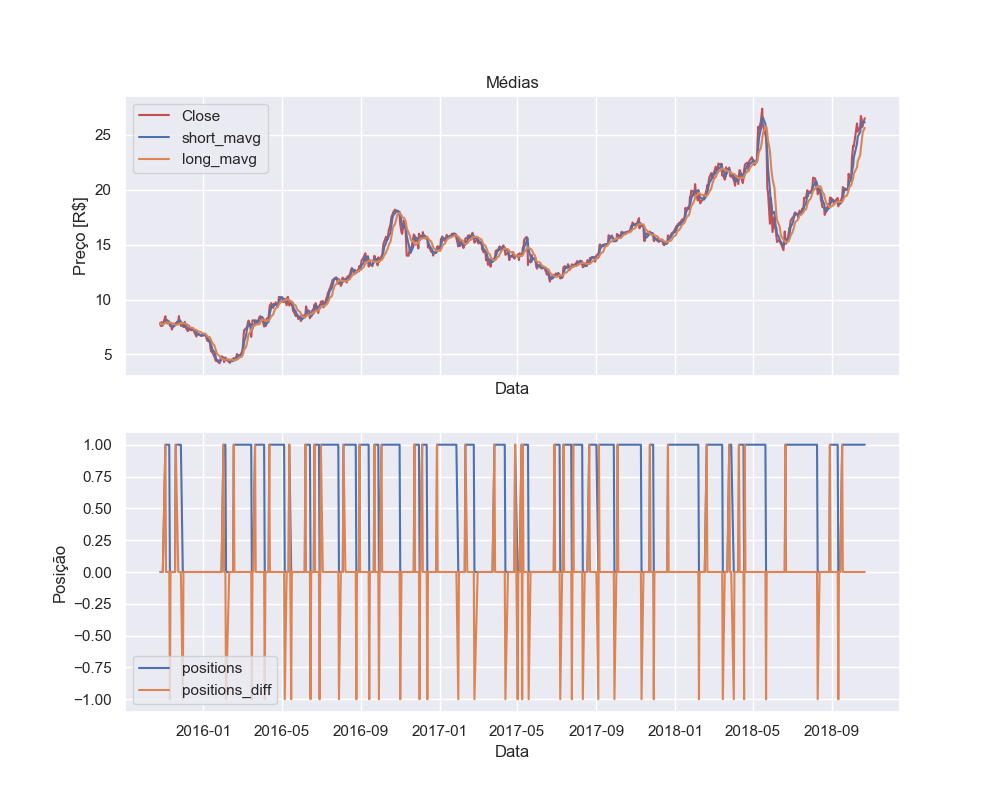

<IPython.core.display.Javascript object>


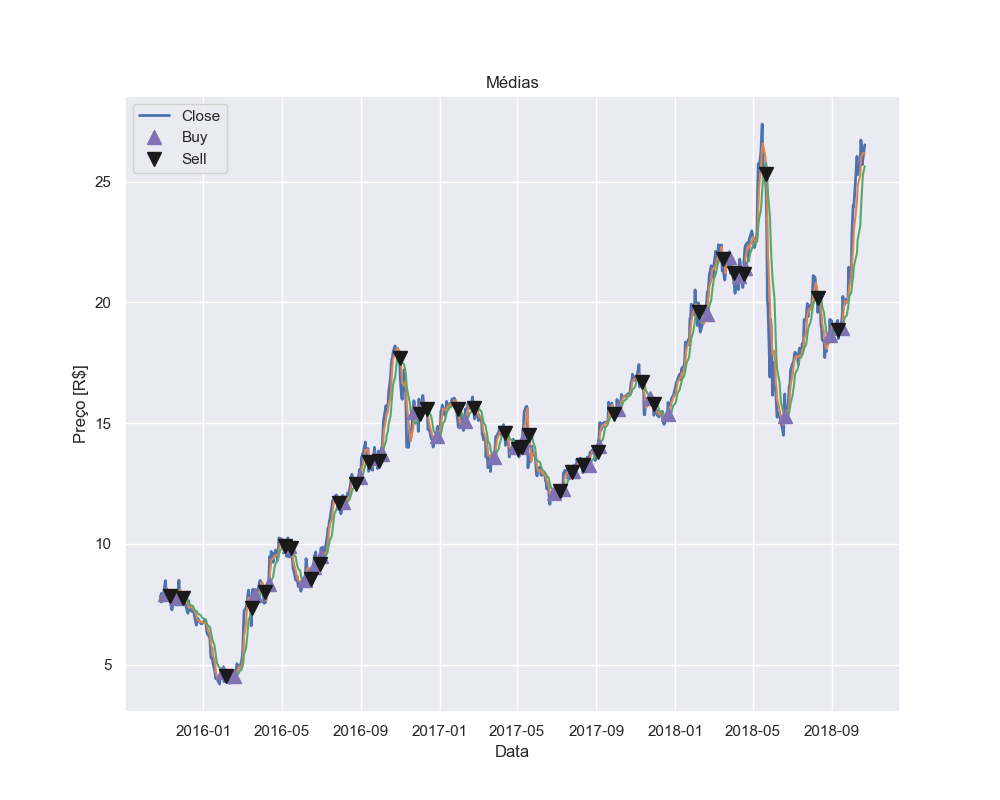

<IPython.core.display.Javascript object>


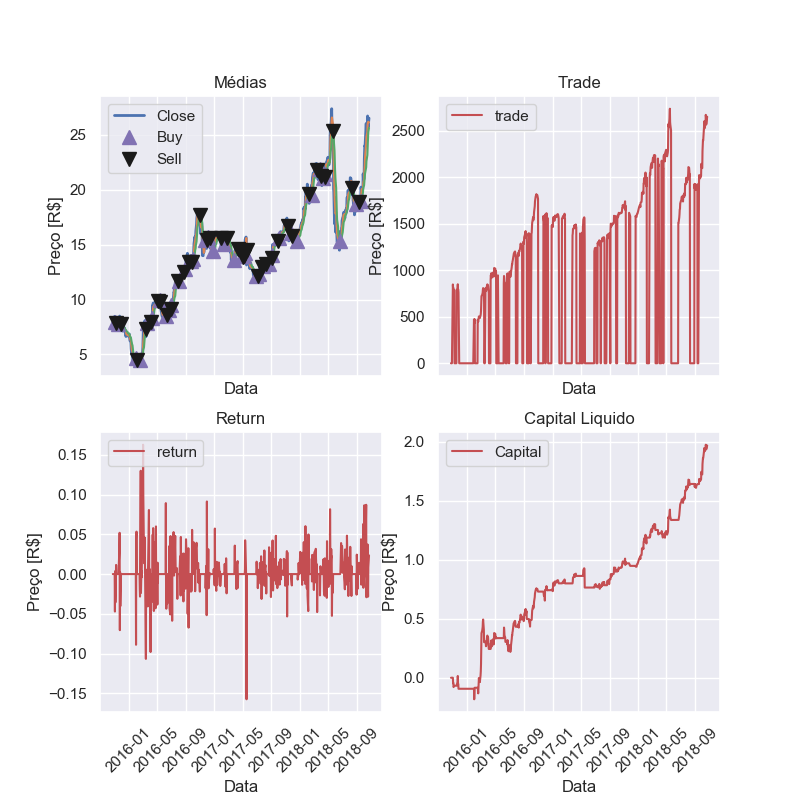

In [39]:
graf_media(stock_PETR4,4,10)

<IPython.core.display.Javascript object>


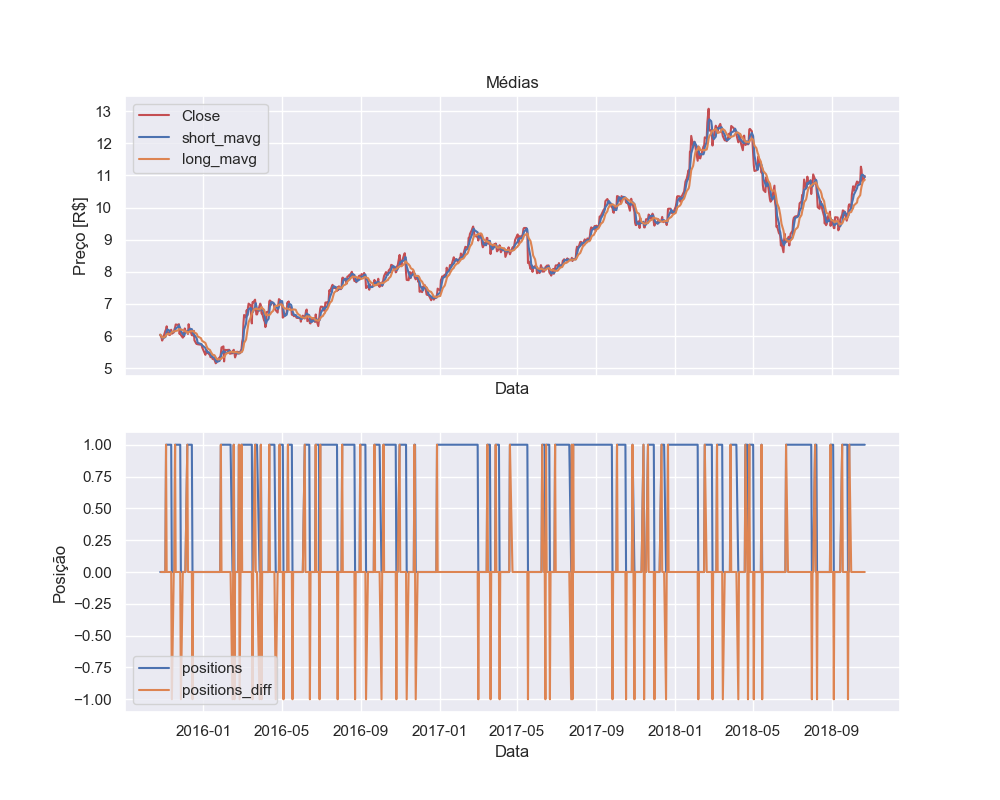

<IPython.core.display.Javascript object>


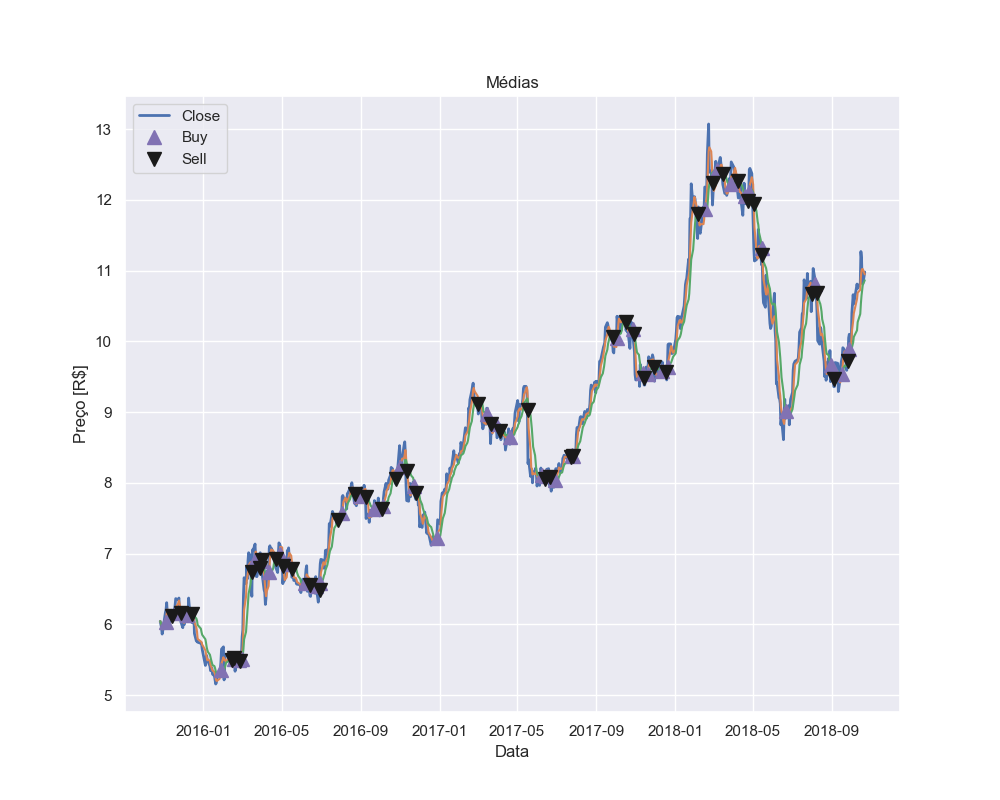

<IPython.core.display.Javascript object>


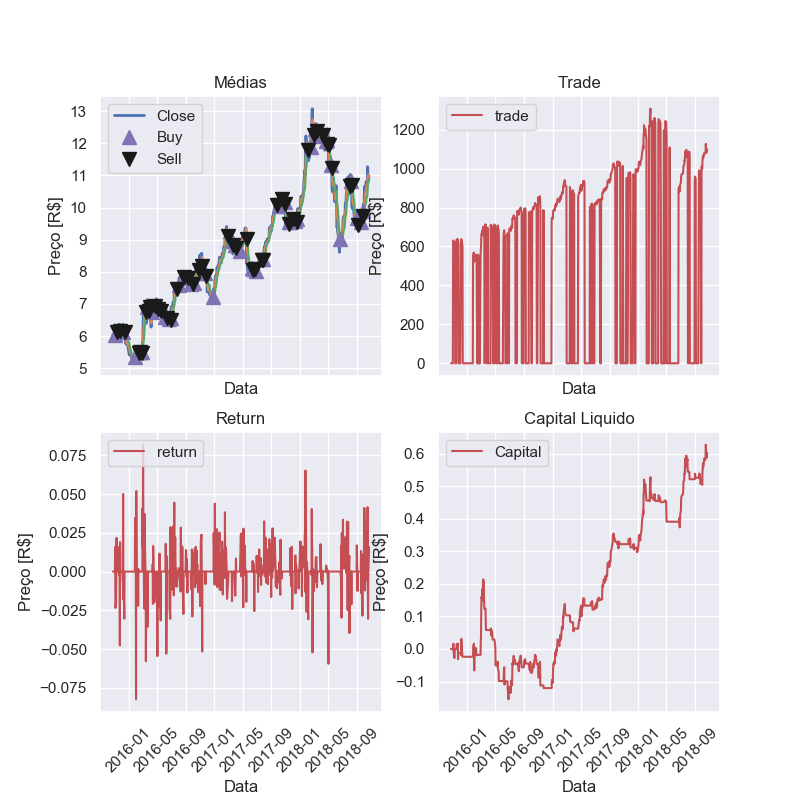

In [40]:
graf_media(stock_ITSA4,4,10)

<IPython.core.display.Javascript object>


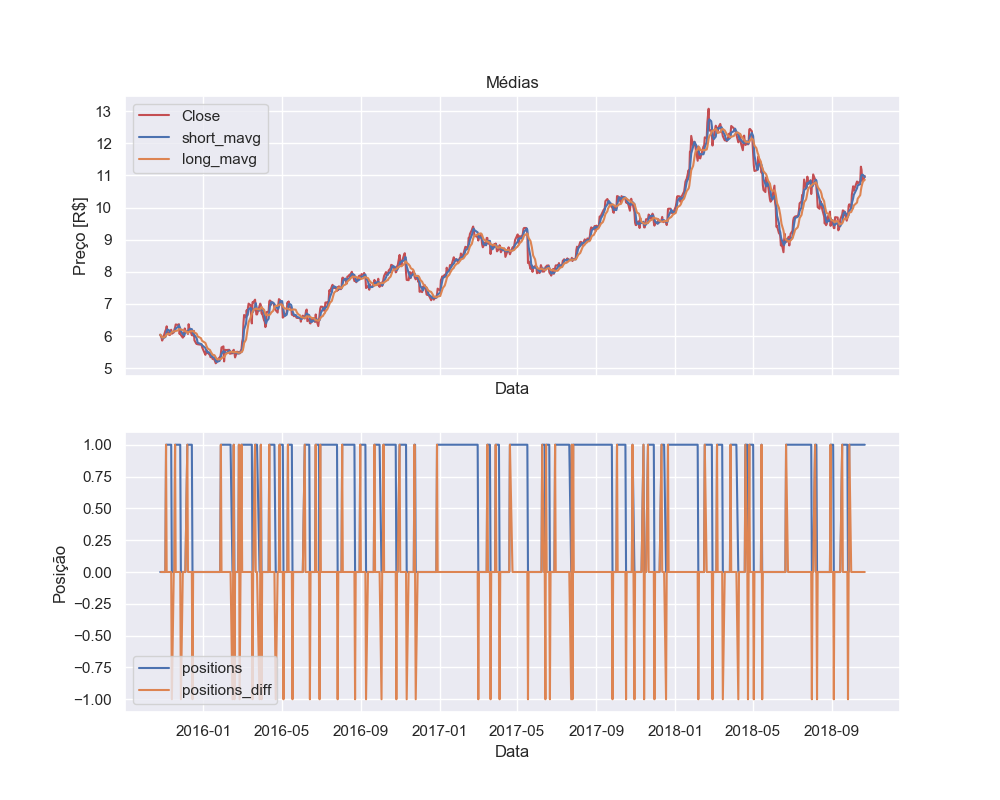

<IPython.core.display.Javascript object>


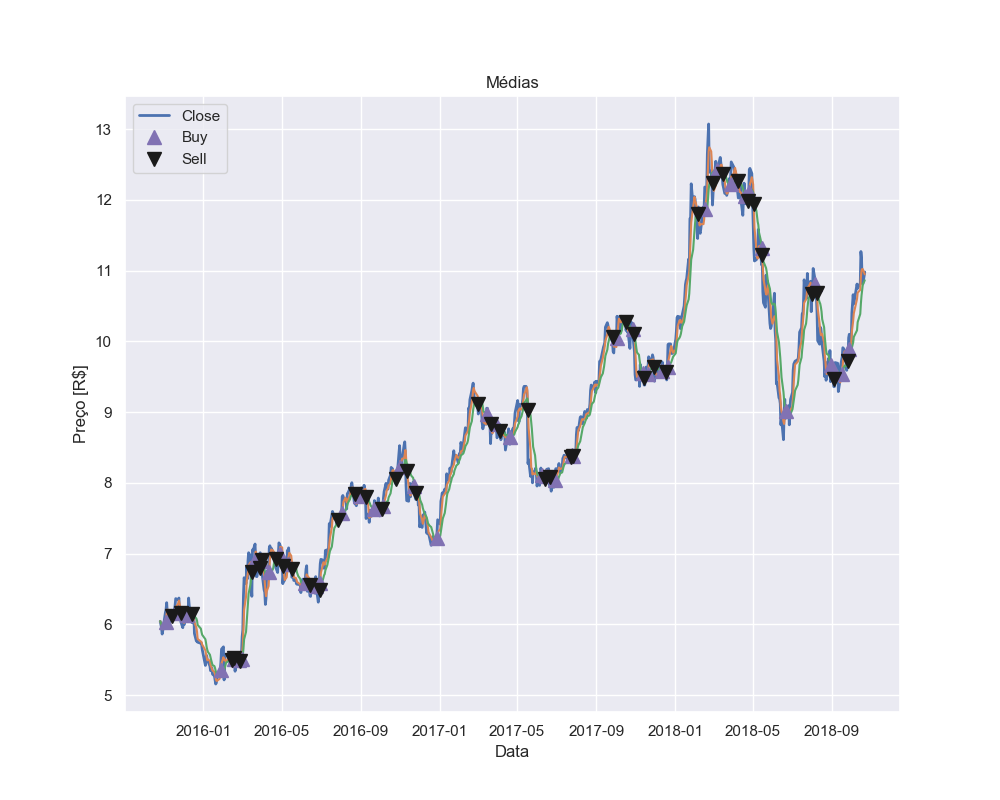

<IPython.core.display.Javascript object>


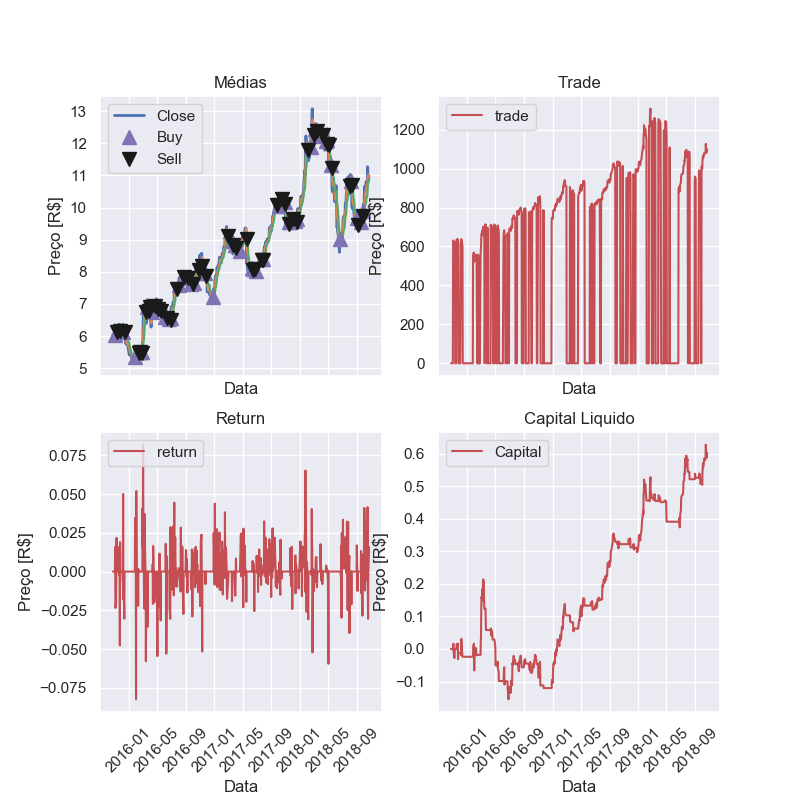

In [42]:
graf_media(stock_USIM5,4,10)

<IPython.core.display.Javascript object>


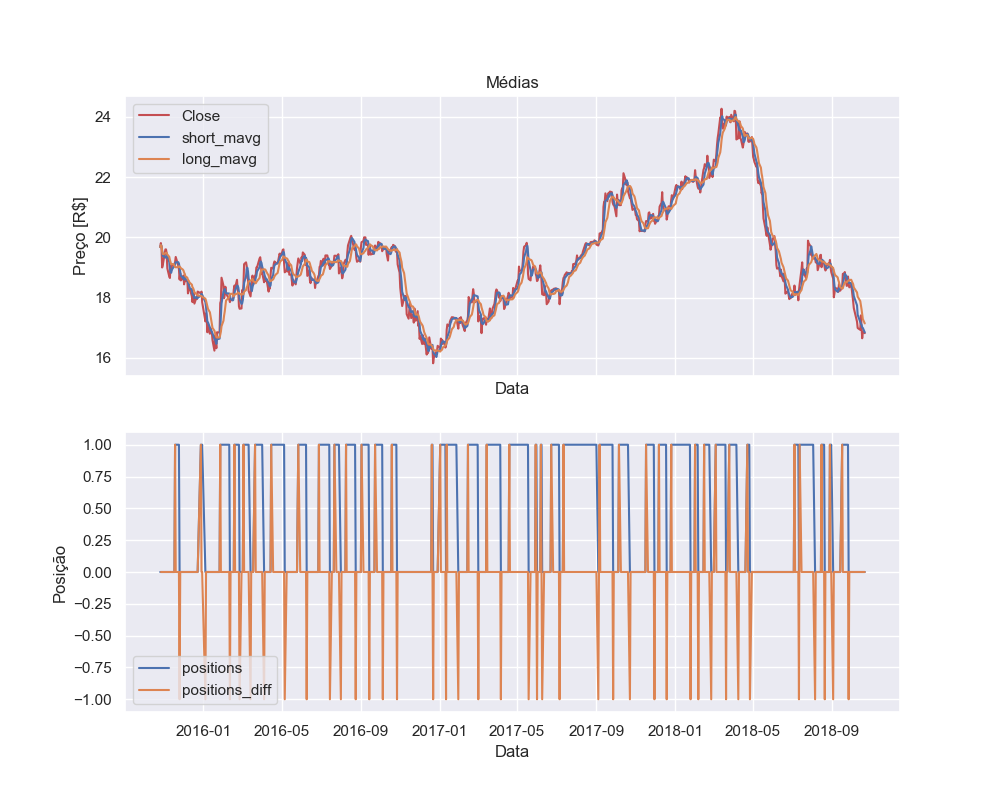

<IPython.core.display.Javascript object>


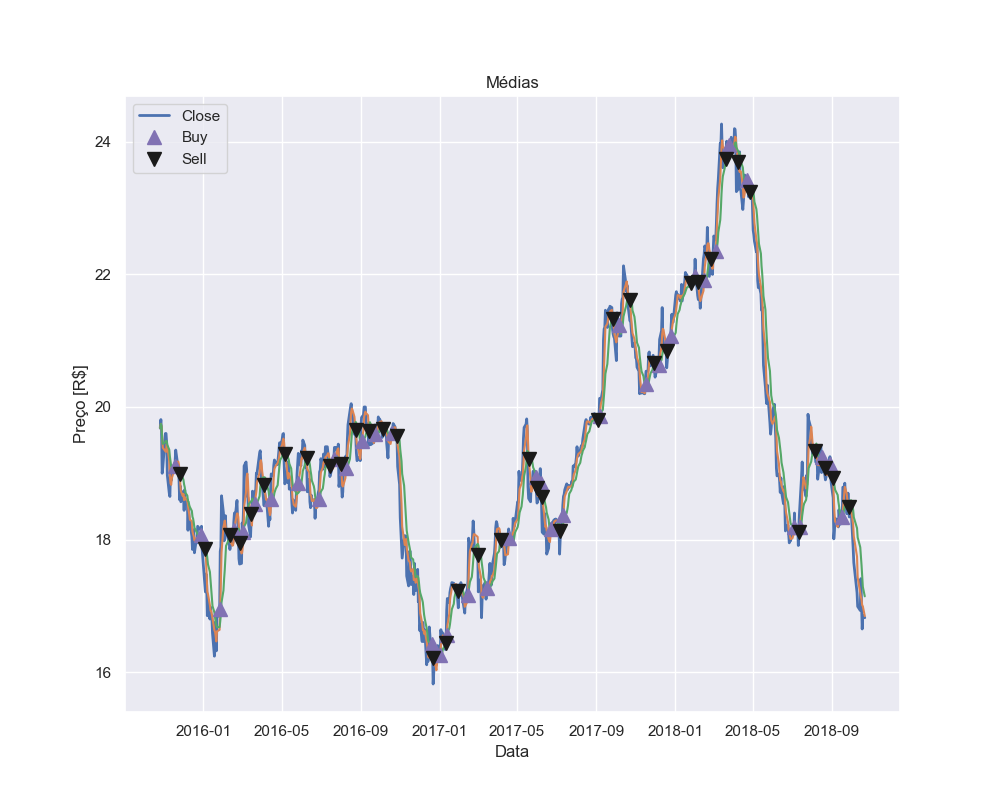

<IPython.core.display.Javascript object>


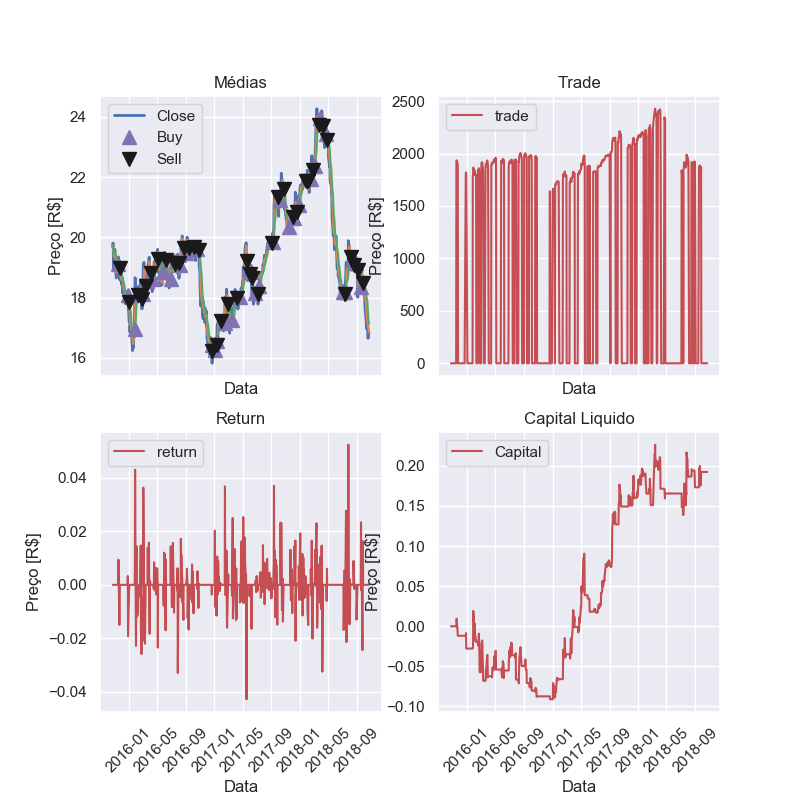

In [43]:
graf_media(stock_ABEV3,4,10)

<IPython.core.display.Javascript object>


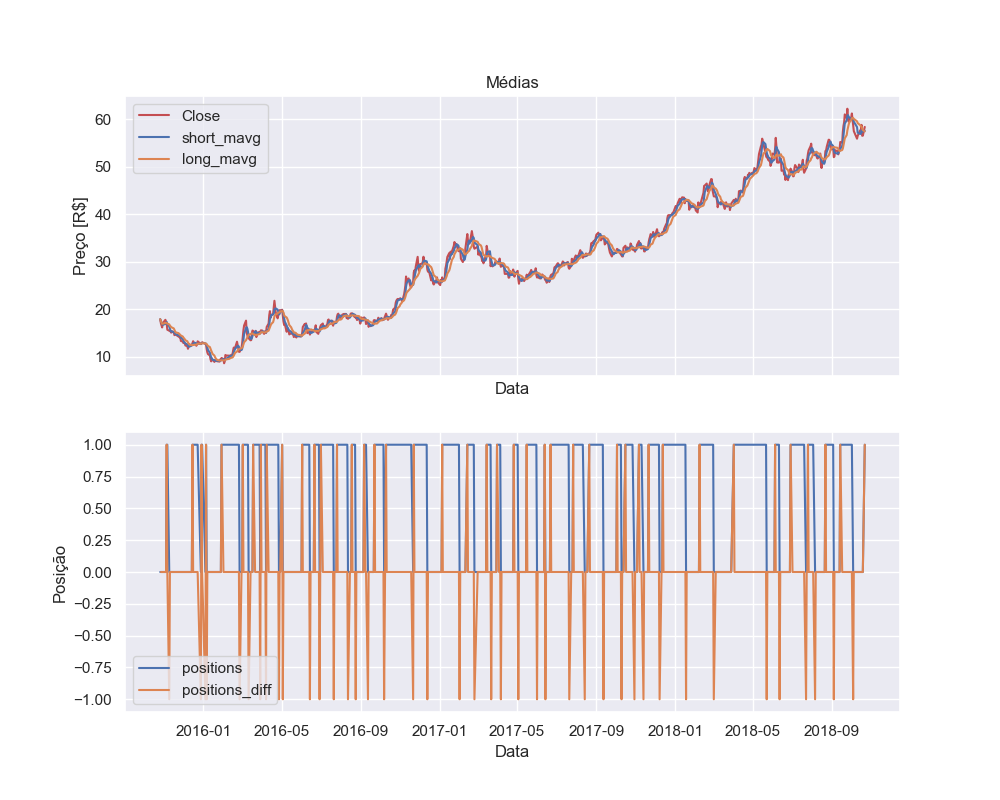

<IPython.core.display.Javascript object>


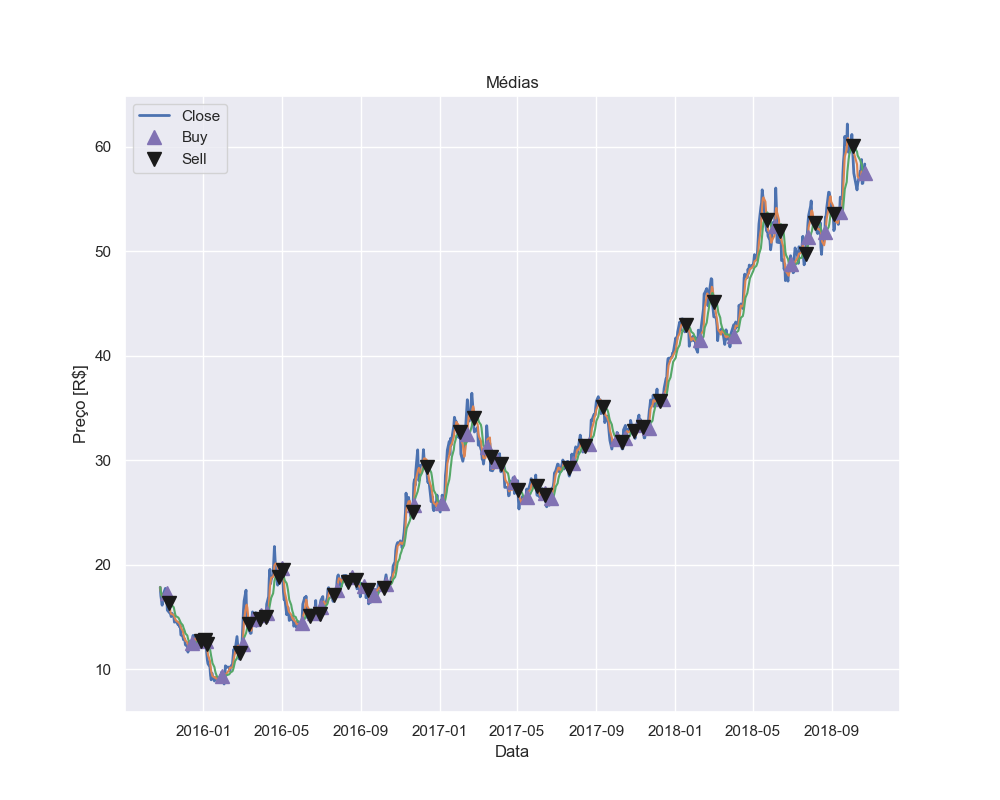

<IPython.core.display.Javascript object>


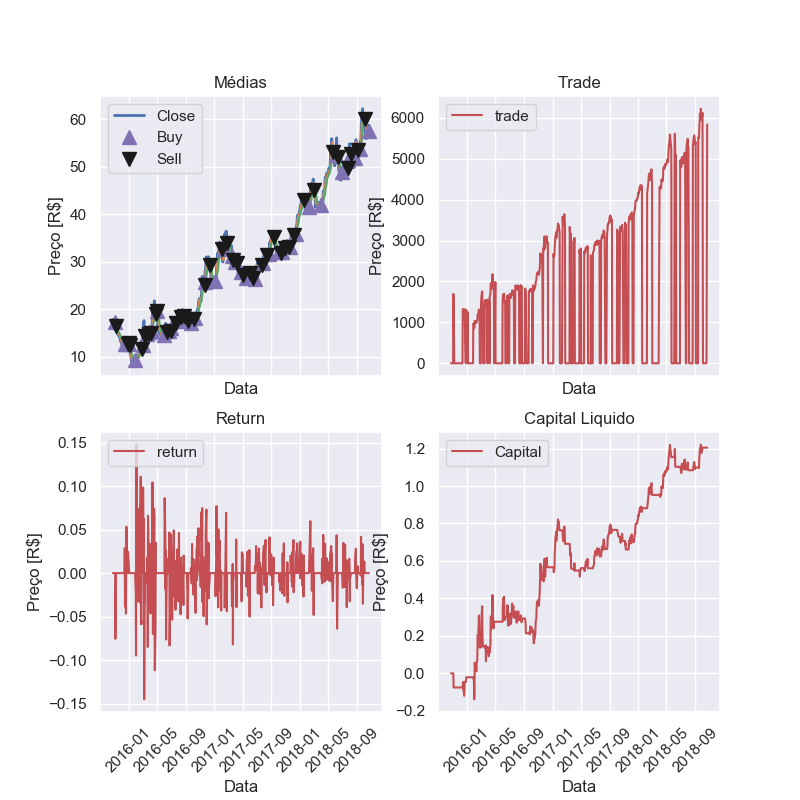

In [44]:
graf_media(stock_VALE3,4,10)

In [20]:
[stock_PETR4['Close'].pct_change().sum()/stock_PETR4['Close'].pct_change().std(),portfolio['return'].sum()/portfolio['return'].std()]

[49.106921432130854, 79.2585233269192]